In [1]:
"""
Visualization of clusters
"""
import sys

try:
    import networkx as nx
except ImportError:
    sys.stderr.write("Networkx not present\n")
    raise
    
try:
    from matplotlib.pylab import show, cm, axis
except ImportError:
    sys.stderr.write("Matplotlib not present\n")
    raise


def draw_graph(matrix, clusters, **kwargs):
    """
    Visualize the clustering
    
    :param matrix: The unprocessed adjacency matrix
    :param clusters: list of tuples containing clusters as returned
                     by 'get_clusters'
    :param kwargs: Additional keyword arguments to be passed to
                   networkx.draw_networkx
    """
    # make a networkx graph from the adjacency matrix
    graph = nx.Graph(matrix)
    
    # map node to cluster id for colors
    cluster_map = {node: i for i, cluster in enumerate(clusters) for node in cluster}
    colors = [cluster_map[i] for i in range(len(graph.nodes()))]
    
    # if colormap not specified in kwargs, use a default
    if not kwargs.get("cmap", False):
        kwargs["cmap"] = cm.tab20
    
    # draw
    nx.draw_networkx(graph, node_color=colors, **kwargs)
    axis("off")
    show(block=False)



In [8]:
# import numpy as np
# from scipy.sparse import isspmatrix, dok_matrix, csc_matrix
# import sklearn.preprocessing


# def sparse_allclose(a, b, rtol=1e-5, atol=1e-8):
#     """
#     Version of np.allclose for use with sparse matrices
#     """
#     c = np.abs(a - b) - rtol * np.abs(b)
#     # noinspection PyUnresolvedReferences
#     return c.max() <= atol


# def normalize(matrix):
#     """
#     Normalize the columns of the given matrix
    
#     :param matrix: The matrix to be normalized
#     :returns: The normalized matrix
#     """
#     return sklearn.preprocessing.normalize(matrix, norm="l1", axis=0)


# def inflate(matrix, power):
#     """
#     Apply cluster inflation to the given matrix by raising
#     each element to the given power.
    
#     :param matrix: The matrix to be inflated
#     :param power: Cluster inflation parameter
#     :returns: The inflated matrix
#     """
#     if isspmatrix(matrix):
#         return normalize(matrix.power(power))

#     return normalize(np.power(matrix, power))


# def expand(matrix, power):
#     """
#     Apply cluster expansion to the given matrix by raising
#     the matrix to the given power.
    
#     :param matrix: The matrix to be expanded
#     :param power: Cluster expansion parameter
#     :returns: The expanded matrix
#     """
#     if isspmatrix(matrix):
#         return matrix ** power

#     return np.linalg.matrix_power(matrix, power)


# def add_self_loops(matrix, loop_value):
#     """
#     Add self-loops to the matrix by setting the diagonal
#     to loop_value
    
#     :param matrix: The matrix to add loops to
#     :param loop_value: Value to use for self-loops
#     :returns: The matrix with self-loops
#     """
#     shape = matrix.shape
#     assert shape[0] == shape[1], "Error, matrix is not square"

#     if isspmatrix(matrix):
#         new_matrix = matrix.todok()
#     else:
#         new_matrix = matrix.copy()

#     for i in range(shape[0]):
#         new_matrix[i, i] = loop_value

#     if isspmatrix(matrix):
#         return new_matrix.tocsc()

#     return new_matrix


# def prune(matrix, threshold):
#     """
#     Prune the matrix so that very small edges are removed.
#     The maximum value in each column is never pruned.
    
#     :param matrix: The matrix to be pruned
#     :param threshold: The value below which edges will be removed
#     :returns: The pruned matrix
#     """
#     if isspmatrix(matrix):
#         pruned = dok_matrix(matrix.shape)
#         pruned[matrix >= threshold] = matrix[matrix >= threshold]
#         pruned = pruned.tocsc()
#     else:
#         pruned = matrix.copy()
#         pruned[pruned < threshold] = 0

#     # keep max value in each column. same behaviour for dense/sparse
#     num_cols = matrix.shape[1]
#     row_indices = matrix.argmax(axis=0).reshape((num_cols,))
#     col_indices = np.arange(num_cols)
#     pruned[row_indices, col_indices] = matrix[row_indices, col_indices]

#     return pruned


# def converged(matrix1, matrix2):
#     """
#     Check for convergence by determining if 
#     matrix1 and matrix2 are approximately equal.
    
#     :param matrix1: The matrix to compare with matrix2
#     :param matrix2: The matrix to compare with matrix1
#     :returns: True if matrix1 and matrix2 approximately equal
#     """
#     if isspmatrix(matrix1) or isspmatrix(matrix2):
#         return sparse_allclose(matrix1, matrix2)

#     return np.allclose(matrix1, matrix2)


# def iterate(matrix, expansion, inflation):
#     """
#     Run a single iteration (expansion + inflation) of the mcl algorithm
    
#     :param matrix: The matrix to perform the iteration on
#     :param expansion: Cluster expansion factor
#     :param inflation: Cluster inflation factor
#     """
#     # Expansion
#     matrix = expand(matrix, expansion)

#     # Inflation
#     matrix = inflate(matrix, inflation)

#     return matrix


# def get_clusters(matrix):
#     """
#     Retrieve the clusters from the matrix
    
#     :param matrix: The matrix produced by the MCL algorithm
#     :returns: A list of tuples where each tuple represents a cluster and
#               contains the indices of the nodes belonging to the cluster
#     """
#     if not isspmatrix(matrix):
#         # cast to sparse so that we don't need to handle different 
#         # matrix types
#         matrix = csc_matrix(matrix)

#     # get the attractors - non-zero elements of the matrix diagonal
#     attractors = matrix.diagonal().nonzero()[0]

#     # somewhere to put the clusters
#     clusters = set()

#     # the nodes in the same row as each attractor form a cluster
#     for attractor in attractors:
#         cluster = tuple(matrix.getrow(attractor).nonzero()[1].tolist())
#         clusters.add(cluster)

#     return sorted(list(clusters))


# def run_mcl(matrix, expansion=2, inflation=2, loop_value=1,
#             iterations=100, pruning_threshold=0.001, pruning_frequency=1,
#             convergence_check_frequency=1):
#     """
#     Perform MCL on the given similarity matrix
    
#     :param matrix: The similarity matrix to cluster
#     :param expansion: The cluster expansion factor
#     :param inflation: The cluster inflation factor
#     :param loop_value: Initialization value for self-loops
#     :param iterations: Maximum number of iterations
#            (actual number of iterations will be less if convergence is reached)
#     :param pruning_threshold: Threshold below which matrix elements will be set
#            set to 0
#     :param pruning_frequency: Perform pruning every 'pruning_frequency'
#            iterations. 
#     :param convergence_check_frequency: Perform the check for convergence
#            every convergence_check_frequency iterations
#     :param verbose: Print extra information to the console
#     :returns: The final matrix
#     """
#     assert expansion > 1, "Invalid expansion parameter"
#     assert inflation > 1, "Invalid inflation parameter"
#     assert loop_value >= 0, "Invalid loop_value"
#     assert iterations > 0, "Invalid number of iterations"
#     assert pruning_threshold >= 0, "Invalid pruning_threshold"
#     assert pruning_frequency > 0, "Invalid pruning_frequency"
#     assert convergence_check_frequency > 0, "Invalid convergence_check_frequency"


#     print("-" * 50)
#     print("MCL Parameters")
#     print("Expansion: {}".format(expansion))
#     print("Inflation: {}".format(inflation))
#     if pruning_threshold > 0:
#         print("Pruning threshold: {}, frequency: {} iteration{}".format(
#             pruning_threshold, pruning_frequency, "s" if pruning_frequency > 1 else ""))
#     else:
#         print("No pruning")
#     print("Convergence check: {} iteration{}".format(
#         convergence_check_frequency, "s" if convergence_check_frequency > 1 else ""))
#     print("Maximum iterations: {}".format(iterations))
#     print("{} matrix mode".format("Sparse" if isspmatrix(matrix) else "Dense"))
#     print("-" * 50)

#     # Initialize self-loops
#     if loop_value > 0:
#         matrix = add_self_loops(matrix, loop_value)

#     # Normalize
#     matrix = normalize(matrix)

#     # iterations
#     for i in range(iterations):
#         print("Iteration {}".format(i + 1))

#         # store current matrix for convergence checking
#         last_mat = matrix.copy()

#         # perform MCL expansion and inflation
#         matrix = iterate(matrix, expansion, inflation)

#         # prune
#         if pruning_threshold > 0 and i % pruning_frequency == pruning_frequency - 1:
#             print("Pruning")
#             matrix = prune(matrix, pruning_threshold)

#         # Check for convergence
#         if i % convergence_check_frequency == convergence_check_frequency - 1:
#             print("Checking for convergence")
#             if converged(matrix, last_mat):
#                 print("Converged after {} iteration{}".format(i + 1, "s" if i > 0 else ""))
#                 break

#     print("-" * 50)

#     return matrix


In [9]:

# # # G = nx.karate_club_graph()
# # G = nx.balanced_tree(2,3)
# G = nx.balanced_tree(2,5)
# # Build adjacency matrix
# A = nx.to_numpy_matrix(G)
# # Run MCL algorithm
# result = run_mcl(A)
# clusters = get_clusters(result)
# print(clusters)
# draw_graph(A, clusters, node_size=50, with_labels=True, edge_color="silver")

DRUGI ALGORYTM

In [87]:
import sys
import numpy as np

def draw(G, A, cluster_map):

    graph = nx.Graph(G)
    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))
    
    nx.draw_networkx(graph,node_color =colors,linewidths=7)
    axis("off")
    show(block=False)

def normalize(A):
#   Normalize the columns of the given matrix
    return sklearn.preprocessing.normalize(A, norm="l1", axis=0)

def inflate(A, inflate_factor):
#   Apply cluster inflation to the given matrix by raising each element to the given power.
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
#   Apply cluster expansion to the given matrix by raising the matrix to the given power.
    return np.linalg.matrix_power(A, expand_factor)

def add_diag(A, mult_factor):
#    Add self-loops to the matrix by setting the diagonal to 1
    return A + mult_factor * np.identity(A.shape[0])

def get_clusters(A):
    clusters = []
    for i, r in enumerate((A>0).tolist()):
        if r[i]:
            clusters.append(A[i,:]>0)

    clust_map  ={}
    for cn , c in enumerate(clusters):
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]
    return clust_map

def stop(M, i):
    if i%5==4:
        m = np.max( M**2 - M) - np.min( M**2 - M)
        if m==0:
            print("Stop at iteration %s" % i)
            return True
    return False


def mcl(M, expand_factor = 2, inflate_factor = 2, max_loop = 10 , mult_factor = 1):
    M = add_diag(M, mult_factor)
    M = normalize(M)
    
    for i in range(max_loop):
        M = expand(M, expand_factor)
        M = inflate(M, inflate_factor)
        
        if stop(M, i): break

    clusters = get_clusters(M)
    return M, clusters

def networkx_mcl(G, expand_factor = 2, inflate_factor = 2, max_loop = 50 , mult_factor = 1):
    A = nx.adjacency_matrix(G)
    return mcl(np.array(A.todense()), expand_factor, inflate_factor, max_loop, mult_factor)


def calculate_and_draw(Graph): 
    M = nx.to_numpy_matrix(Graph)
    print(" number of nodes: %s\n" % M.shape[0])
    
    M, clusters = networkx_mcl(Graph)
    [print(key, ": ", value) for key, value in clusters.items()]
    
    draw(Graph, M, clusters)


# https://networkx.org/documentation/stable/reference/generators.html

 number of nodes: 16

Stop at iteration 14
0 :  [0, 1]
1 :  [2, 3]
2 :  [4, 5]
3 :  [6, 7]
4 :  [8, 9]
5 :  [10, 12]
6 :  [11, 13]
7 :  [14, 15]


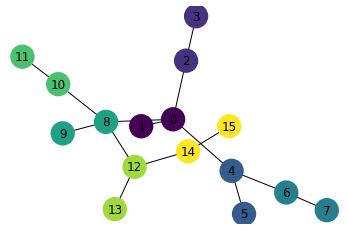

In [88]:
G_bin = nx.binomial_tree(4)
calculate_and_draw(G_bin)

 number of nodes: 15

0 :  [0, 1, 3, 7, 8]
1 :  [0, 1, 4, 9, 10]
2 :  [0, 2, 5, 11, 12]
3 :  [0, 2, 6, 13, 14]


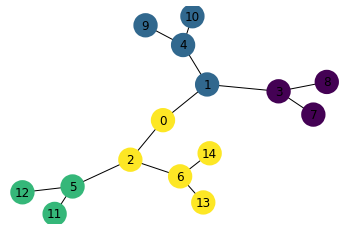

In [89]:
G_balanced = nx.balanced_tree(2,3)
calculate_and_draw(G_balanced)

 number of nodes: 63

0 :  [0, 1, 3, 4]
1 :  [0, 2, 5, 6]
2 :  [7, 15, 31, 32]
3 :  [7, 16, 33, 34]
4 :  [8, 17, 35, 36]
5 :  [8, 18, 37, 38]
6 :  [9, 19, 39, 40]
7 :  [9, 20, 41, 42]
8 :  [10, 21, 43, 44]
9 :  [10, 22, 45, 46]
10 :  [11, 23, 47, 48]
11 :  [11, 24, 49, 50]
12 :  [12, 25, 51, 52]
13 :  [12, 26, 53, 54]
14 :  [13, 27, 55, 56]
15 :  [13, 28, 57, 58]
16 :  [14, 29, 59, 60]
17 :  [14, 30, 61, 62]


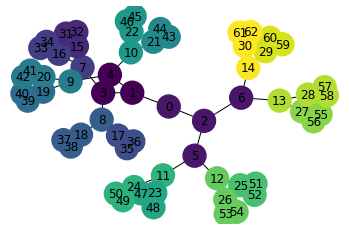

In [90]:
G_balanced = nx.balanced_tree(2,5)
calculate_and_draw(G_balanced)